# Loading the data

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,auc,roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [130]:
data=pd.read_csv(r'./cancer-risk-factors.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

# Pre-processing the data

In [131]:
print(data['Risk_Level'].unique())

['Medium' 'Low' 'High']


In [132]:
risk_weight={'Low':0,'Medium':1,'High':2}
data['Risk_Level']=data['Risk_Level'].map(risk_weight)

In [133]:
print(data['Risk_Level'].unique())

[1 0 2]


In [134]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

# Feature Selection

In [135]:
X=data.drop(columns=['Patient_ID','Cancer_Type'])
y=data['Cancer_Type']

In [136]:
print(y.unique())

['Breast' 'Prostate' 'Skin' 'Colon' 'Lung']


In [137]:
print(X.head(),y.head())

   Age  Gender  Smoking  Alcohol_Use  Obesity  Family_History  Diet_Red_Meat  \
0   68       0        7            2        8               0              5   
1   74       1        8            9        8               0              0   
2   55       1        7           10        7               0              3   
3   61       0        6            2        2               0              6   
4   67       1       10            7        4               0              6   

   Diet_Salted_Processed  Fruit_Veg_Intake  Physical_Activity  Air_Pollution  \
0                      3                 7                  4              6   
1                      3                 7                  1              3   
2                      3                 4                  1              8   
3                      2                 4                  6              4   
4                      3                10                  9             10   

   Occupational_Hazards  BRCA_Mutation

In [138]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy')

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_],axis = 0)

feature_mapping={}
for i in range(len(X.columns)):
    if feature_importance_normalized[i]>=0.005:
        feature_mapping[X.columns[i]]=feature_importance_normalized[i]

for i in feature_mapping:
    print(i,":",feature_mapping[i])


Gender : 0.01465666039065318
Smoking : 0.0390108204432867
Alcohol_Use : 0.005030201671582261
Obesity : 0.010811184967249641
Diet_Red_Meat : 0.01243196003312042
Air_Pollution : 0.01372789227985351
Calcium_Intake : 0.011123124695287322
Overall_Risk_Score : 0.008124618796202729
BMI : 0.005645364246185264
Physical_Activity_Level : 0.006433653984851684


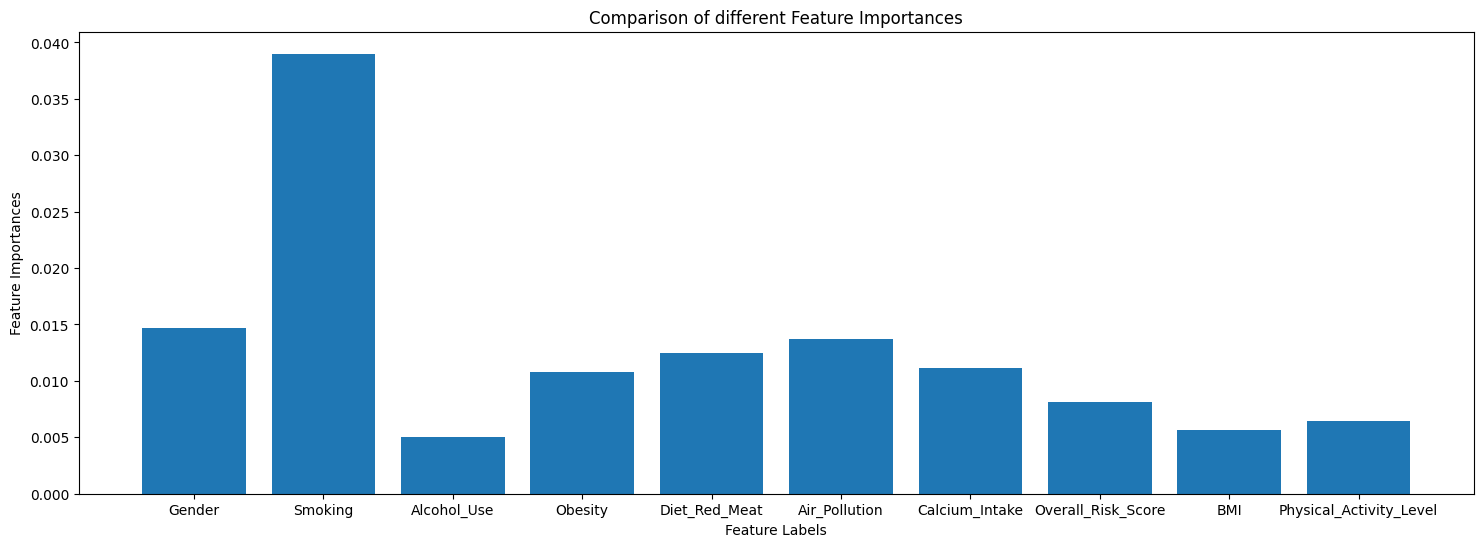

In [139]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(18,6))
plt.bar(feature_mapping.keys(),feature_mapping.values())
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [140]:
dropped_columns=[i for i in X.columns if i not in feature_mapping]
print(dropped_columns)

['Age', 'Family_History', 'Diet_Salted_Processed', 'Fruit_Veg_Intake', 'Physical_Activity', 'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection', 'Risk_Level']


In [141]:
X.drop(columns=dropped_columns,inplace=True)

# Train-test splitting

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=101)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# printing out train and test sets

print('X_train : ')
print(X_train)

print('')
print('y_train : ')
print(y_train)

(1400, 10)
(600, 10)
(1400,)
(600,)
X_train : 
[[-0.95118973 -0.93125996  1.21019161 ...  0.10760204  1.10760595
  -0.29970607]
 [-0.95118973  1.18327841  1.21019161 ...  0.88528195 -0.69465346
   1.59175224]
 [ 1.05131497 -1.23333687 -1.25509505 ... -2.76125846  0.55909221
   0.64602308]
 ...
 [ 1.05131497 -1.53541378 -1.25509505 ... -1.35147302 -0.17225943
  -0.93019218]
 [-0.95118973  1.18327841 -0.94693422 ... -1.25743392 -1.53048391
   1.27650919]
 [ 1.05131497 -0.32710614 -1.56325588 ...  0.57113853  1.39492266
   0.33078003]]

y_train : 
1976      Breast
307       Breast
705     Prostate
737         Skin
1725        Lung
          ...   
248     Prostate
1297        Lung
943         Skin
703         Lung
1827    Prostate
Name: Cancer_Type, Length: 1400, dtype: object


# Prediction

In [143]:
print(y_test)

159       Skin
1902      Skin
173       Lung
1514      Lung
1279    Breast
         ...  
820       Skin
1497    Breast
1979      Skin
1362     Colon
1460    Breast
Name: Cancer_Type, Length: 600, dtype: object


## Logistic Regression

In [144]:
logreg = LogisticRegression(solver="lbfgs", C=5) 
logreg.fit(X_train,y_train)
y_pred_log=logreg.predict(X_test)
print(y_pred_log)

['Lung' 'Prostate' 'Lung' 'Lung' 'Breast' 'Lung' 'Colon' 'Breast' 'Lung'
 'Skin' 'Prostate' 'Breast' 'Lung' 'Lung' 'Breast' 'Breast' 'Breast'
 'Colon' 'Breast' 'Lung' 'Lung' 'Colon' 'Breast' 'Colon' 'Breast' 'Colon'
 'Colon' 'Lung' 'Skin' 'Colon' 'Prostate' 'Lung' 'Skin' 'Prostate'
 'Breast' 'Colon' 'Breast' 'Breast' 'Prostate' 'Lung' 'Prostate' 'Lung'
 'Lung' 'Lung' 'Breast' 'Colon' 'Colon' 'Breast' 'Lung' 'Breast'
 'Prostate' 'Colon' 'Breast' 'Prostate' 'Breast' 'Prostate' 'Lung'
 'Breast' 'Colon' 'Prostate' 'Prostate' 'Breast' 'Breast' 'Colon'
 'Prostate' 'Prostate' 'Prostate' 'Breast' 'Lung' 'Lung' 'Lung' 'Lung'
 'Prostate' 'Breast' 'Breast' 'Breast' 'Lung' 'Skin' 'Prostate' 'Prostate'
 'Colon' 'Colon' 'Colon' 'Breast' 'Prostate' 'Breast' 'Lung' 'Colon'
 'Breast' 'Prostate' 'Colon' 'Colon' 'Skin' 'Prostate' 'Prostate' 'Lung'
 'Colon' 'Lung' 'Colon' 'Prostate' 'Lung' 'Breast' 'Lung' 'Skin' 'Lung'
 'Lung' 'Breast' 'Prostate' 'Lung' 'Lung' 'Breast' 'Breast' 'Lung' 'Lung'
 'Lung' 'Lung

In [145]:
def true_positive(y_true, y_pred,c):
    y_true=np.array(y_true)
    tp = 0
    n=len(y_true)
    #print(c,"\n",y_true,"\n",y_pred)
    #print(len(y_true),len(y_pred))
    for i in range(n):        
        #print("yt:",y_true[i]," yp:",y_pred[i])
        if y_true[i] == c and y_pred[i] == c:
           tp += 1
           #print(1)
    return tp

print(true_positive(y_test,y_pred_log,"Skin"))
print(true_positive(y_test,y_pred_log,"Lung"))
print(true_positive(y_test,y_pred_log,"Breast"))
print(true_positive(y_test,y_pred_log,"Colon"))
print(true_positive(y_test,y_pred_log,"Prostate"))

25
136
107
83
61


In [146]:
count=len([i for i in y_test if i=='Skin'])
count

87

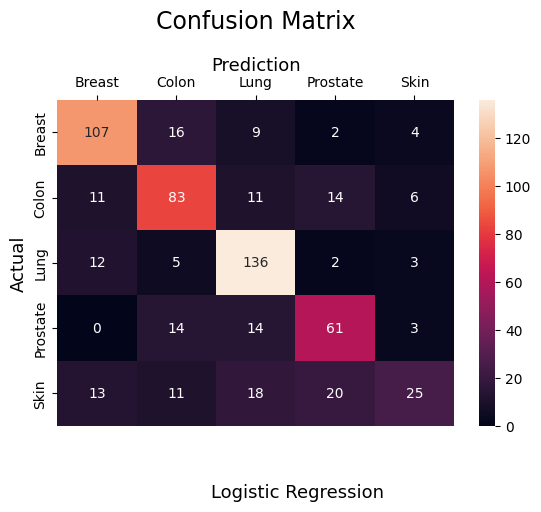

In [151]:
cm = confusion_matrix(np.array(y_test),y_pred_log)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=sorted(y_test.unique()),yticklabels=sorted(y_test.unique()))
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Logistic Regression', ha='center', fontsize=13)
plt.show()

In [148]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

      Breast       0.75      0.78      0.76       138
       Colon       0.64      0.66      0.65       125
        Lung       0.72      0.86      0.79       158
    Prostate       0.62      0.66      0.64        92
        Skin       0.61      0.29      0.39        87

    accuracy                           0.69       600
   macro avg       0.67      0.65      0.65       600
weighted avg       0.68      0.69      0.67       600



# Accuracy Metrics

In [160]:
def true_positive(y_true, y_pred,c):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == c and yp == c:
            tp += 1
    return tp

def true_negative(y_true, y_pred,c):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt !=c and yp != c:
            tn += 1
    return tn

def false_positive(y_true, y_pred,c):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != c and yp == c:
            fp += 1
    return fp

def false_negative(y_true, y_pred,c):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == c and yp != c:
            fn += 1
    return fn

def accuracy(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    tn=true_negative(y_true,y_pred,c)
    fp=false_positive(y_true,y_pred,c)
    fn=false_negative(y_true,y_pred,c)
    return (tp+tn)/(tp+tn+fp+fn)

def precision(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    fp=false_positive(y_true,y_pred,c)    
    return tp/(tp+fp)

def recall(y_true, y_pred,c):
    tp=true_positive(y_true,y_pred,c)
    fn=false_negative(y_true,y_pred,c)    
    return tp/(tp+fn)

def f1(y_true, y_pred,c):
    p=precision(y_true,y_pred,c)
    r=recall(y_true,y_pred,c)    
    return 2*p*r/(p+r)


In [167]:
print("For logistic regresion")
c="Breast"
print("True Positive: ",true_positive(y_test,y_pred_log,c))
print("True Negative: ",true_negative(y_test,y_pred_log,c))
print("False Positive: ",false_positive(y_test,y_pred_log,c))
print("False Negative: ",false_negative(y_test,y_pred_log,c))
print("Accuracy: ",accuracy(y_test,y_pred_log,c)*100)
print("Precision: ",precision(y_test,y_pred_log,c)*100)
print("Recall: ",recall(y_test,y_pred_log,c)*100)
print("F1: ",f1(y_test,y_pred_log,c)*100)
print("MCC: ",matthews_corrcoef(y_test,y_pred_log)*100)
print("AUC: ",roc_auc_score(auc(y_test,y_pred_log)*100))


For logistic regresion
True Positive:  107
True Negative:  426
False Positive:  36
False Negative:  31
Accuracy:  88.83333333333333
Precision:  74.82517482517483
Recall:  77.53623188405797
F1:  76.15658362989323
MCC:  60.30509764347259


TypeError: unsupported operand type(s) for -: 'str' and 'str'